In [1]:
# importing relevant libraries
import numpy as np
from math import exp
import matplotlib.pyplot as plt

In [2]:
# Update function takes current state to next state
# Obeying Periodic Boundary Condition

def update(s, L):
    # 'nudge' is the matrix that contains the changes
    # to be done in coordinates of particles to take
    # them to a new state. Norm is taken to ensure
    # <0.1 unit displacement in any random direction
    
    nudge = np.random.uniform(low = -1, high = +1, size = (4, 2))

    for i in range(len(s)):
        mag = np.random.uniform(low = 0, high = 0.1)
        nudge[i] = nudge[i]*(mag/np.linalg.norm(nudge[i]))
        
        s[i] = s[i] + nudge[i]

        # Checking the Boundary condition
        if s[i][0] >= L/2: s[i][0] = s[i][0] - L 
        if s[i][0] < -L/2: s[i][0] = s[i][0] + L 
        if s[i][1] >= L/2: s[i][1] = s[i][1] - L 
        if s[i][1] < -L/2: s[i][1] = s[i][1] + L
    
#     arr = np.array(arr)
    return s

In [3]:
# Using minimum image convention we are ensuring
# we take the closest particle/image into consideration
# while calculating the potential energy of that state

def mic(s, i, j, L):
    dx, dy = (s[j][0] - s[i][0]), (s[j][1] - s[i][1])

    if dx > L/2: dx = dx - L 
    if dx <= -L/2: dx = dx + L
    if dy > L/2: dy = dy - L
    if dy <= -L/2: dy = dy + L

    return np.sqrt(dx**2 + dy**2)

In [4]:
# Lennard-Jones Potential
# takes r generated by mic as input
# returns potential energy of that pair

def pot(r):
    eps = 1
    sig = 3.405
    return 4*eps*((sig/r)**12 - (sig/r)**6)

In [5]:
# Total Potential Energy of a state
# traversing through all the possible unique pairs
# to finally return the total potential energy of the state

def potE(s, L):
    ans = 0
    for i in range(len(s) - 1):
        for j in range(i + 1, len(s)):
            r = mic(s, i, j, L)
            ans = ans + pot(r)
    return ans

In [6]:
# Monte Carlo method takes number of cycles 
# and length of the box as input and returns
# energy array of all valid states, including
# initial state generated randomly

def monteCarlo(n, L):
    energy = []
    curState = np.random.uniform(low = -1, high = 1, size = (4, 2))
    energy.append(potE(curState, 2))
    
    # i keeps count of found valid states
    # j keeps count of number of cycles/searches performed in space
    i, j = 0, 0
    while i < n:
        temp = update(curState, L)
        tempE = potE(temp, L)

        p = np.random.uniform()
        # Condition for a updated state to be valid
        if tempE < energy[j] or p < exp(-(tempE - energy[j])):
            curState = temp
            energy.append(tempE)
            j = j + 1
        
        i = i + 1

    return np.array(energy)

In [7]:
# Generating Energy matrix for all valid states

energyMatrix = monteCarlo(1e3, 2)
print(len(energyMatrix))

28


In [11]:
print("Energy of initial configuratoin: {:e}".format(energyMatrix[0]))
print("Energy of final configuration: {:e}".format(energyMatrix[27]))

Energy of initial configuratoin: 4.905649e+16
Energy of final configuration: 7.633487e+08


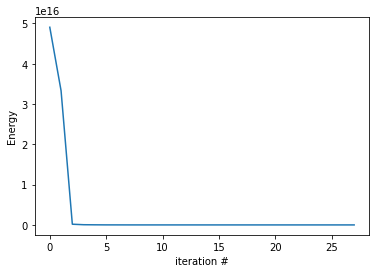

In [8]:
# defining axes for plot
x = np.arange(len(energyMatrix))
y = energyMatrix
  
# plotting the points 
plt.plot(x, y)
  
# naming axes
plt.xlabel('iteration #')
plt.ylabel('Energy')

# function to show the plot
plt.show()